In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.optimizers import *
import tensorflow as tf
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_sample = pd.read_csv('sample_submission.csv')

In [3]:
#First Normalize or scale the data
#Construct a mlp model
#Fit and then predict
y = data['label']
data1 = data.drop('label',axis=1)


In [4]:
#Scaling must be done after train test split
data1.shape

(42000, 784)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(data1,y,test_size=0.3,random_state=42)

In [6]:
scale = MinMaxScaler()
scaled = scale.fit_transform(x_train)
scaled_val = scale.transform(x_val)
scale_test = scale.transform(data_test)

In [7]:
#Change y categories into binary using one hot encoding
y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10)

In [8]:
print(y_train[:10])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
x_train.shape

(29400, 784)

In [10]:
model=Sequential()
model.add(Dense(784,input_shape=(784,),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(392,activation='relu'))
model.add(Dense(196,activation='relu'))
model.add(Dense(98,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')


In [11]:
model.fit(scaled,y_train, epochs=10, batch_size=64,validation_data=(scaled_val,y_val))

Epoch 1/10
460/460 [==============================] - 4s 8ms/step - loss: 0.4156 - val_loss: 0.1687
Epoch 2/10
460/460 [==============================] - 4s 8ms/step - loss: 0.1895 - val_loss: 0.2028
Epoch 3/10
460/460 [==============================] - 4s 8ms/step - loss: 0.1513 - val_loss: 0.1248
Epoch 4/10
460/460 [==============================] - 4s 8ms/step - loss: 0.1279 - val_loss: 0.1025
Epoch 5/10
460/460 [==============================] - 4s 8ms/step - loss: 0.1102 - val_loss: 0.1072
Epoch 6/10
460/460 [==============================] - 4s 8ms/step - loss: 0.1010 - val_loss: 0.1041
Epoch 7/10
460/460 [==============================] - 4s 8ms/step - loss: 0.0884 - val_loss: 0.1078
Epoch 8/10
460/460 [==============================] - 4s 8ms/step - loss: 0.0830 - val_loss: 0.0923
Epoch 9/10
460/460 [==============================] - 4s 8ms/step - loss: 0.0759 - val_loss: 0.1044
Epoch 10/10
460/460 [==============================] - 4s 8ms/step - loss: 0.0713 - val_loss: 0.0982

In [12]:
losses = pd.DataFrame(model.history.history)


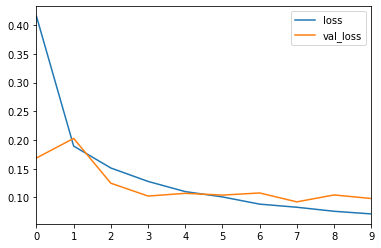

In [13]:
losses.plot()

In [14]:
scale_test.shape

(28000, 784)

In [15]:
pred = model.predict_classes(scale_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [16]:
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [104]:
pred = model.predict(scale_test)

In [105]:
#pick out the highest value(probability)
results = np.argmax(pred,axis = 1)

In [106]:
results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [107]:
pred.shape

(28000, 10)

In [108]:
result = pd.Series(results,name='Label')

In [109]:
result

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [110]:
a = range(1,28001)
submission= pd.DataFrame({
    'ImageId': a,
    'Label': result
})
#submission.set_index('ImageId',inplace=True)
submission.to_csv('submission2.csv',index=False)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix